In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing most common python libraries for exploratory data analysis in python

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing all the datasets of the type attack and normal. The 10 different type of attacks are; back, bufferoverflow, FTPWrite, guesspassword, neptune, Nmap, portsweep, rootkit, satan and smurf. Since the file did not have column with the name of the attack. Hence we have added the column with the name of 'attack' in every file and value in the column as the name of the attack.

In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyber_security/Data_of_Attack_Back_Back.csv")
df1['attack'] = 'Back'

In [4]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyber_security/Data_of_Attack_Back_BufferOverflow.csv")
df2['attack'] = 'BufferOverflow'

In [5]:
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyber_security/Data_of_Attack_Back_FTPWrite.csv")
df3['attack'] = 'FTPWrite'

In [6]:
df4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyber_security/Data_of_Attack_Back_GuessPassword.csv")
df4['attack'] = 'GuessPassword'

In [7]:
df5 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyber_security/Data_of_Attack_Back_Neptune.csv")
df5['attack'] = 'Neptune'

In [8]:
df6 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyber_security/Data_of_Attack_Back_NMap.csv")
df6['attack'] = 'NMap'

In [9]:
df7 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyber_security/Data_of_Attack_Back_Normal.csv")
df7['attack'] = 'Normal'

In [10]:
df8 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyber_security/Data_of_Attack_Back_PortSweep.csv")
df8['attack'] = 'PortSweep'

In [11]:
df9 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyber_security/Data_of_Attack_Back_RootKit.csv")
df9['attack'] = 'RootKit'

In [12]:
df10 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyber_security/Data_of_Attack_Back_Satan.csv")
df10['attack'] = 'Satan'

In [13]:
df11 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyber_security/Data_of_Attack_Back_Smurf.csv")
df11['attack'] = 'Smurf'

First thing is to check the number of rows and columns in each of the file we have imported to the dataframes. Because we need to append all the files into one file to perform the prediction. Here we have total of 11 dataframes, in which 10 are of the attack/intrusion(bad connection) and one is of normal(good connection).

In [14]:
dataframes = {'Data_of_Attack_Back_Back': df1,
              'Data_of_Attack_Back_BufferOverflow': df2,
              'Data_of_Attack_Back_FTPWrite': df3,
              'Data_of_Attack_Back_GuessPassword': df4,
              'Data_of_Attack_Back_Neptune': df5,
              'Data_of_Attack_Back_NMap': df6,
              'Data_of_Attack_Back_Normal': df7,
              'Data_of_Attack_Back_PortSweep': df8,
              'Data_of_Attack_Back_RootKit': df9,
              'Data_of_Attack_Back_Satan': df10,
              'Data_of_Attack_Back_Smurf': df11}

In [15]:
for key, value in dataframes.items():
  print(key,':', value.shape)

Data_of_Attack_Back_Back : (968, 42)
Data_of_Attack_Back_BufferOverflow : (30, 42)
Data_of_Attack_Back_FTPWrite : (7, 42)
Data_of_Attack_Back_GuessPassword : (53, 42)
Data_of_Attack_Back_Neptune : (227228, 42)
Data_of_Attack_Back_NMap : (1554, 42)
Data_of_Attack_Back_Normal : (576710, 42)
Data_of_Attack_Back_PortSweep : (2964, 42)
Data_of_Attack_Back_RootKit : (10, 42)
Data_of_Attack_Back_Satan : (5019, 42)
Data_of_Attack_Back_Smurf : (3007, 42)


We can see that maximum number of rows belong to two dataframe with the name 'normal' and 'neptune'. Whereas, the dataframe with name 'ftpwrite' and 'rootkit' has least number of rows.
We can also see that all the tables have the same number of the columns that is 42.

lets check the column names of each and every data frame, before joining them into single file

In [16]:
for key, value in dataframes.items():
  print(key,':', value.columns)

Data_of_Attack_Back_Back : Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack'],
      dtype='object')
Data_of_Attack_Back_BufferOverflow : Index(['duration', ' protocol_type', ' servic

we can see two problems above;
1. columns name has extra space in them
2. Data_of_Attack_Back_FTPWrite has no columns.

Since we already know that all the data sources has the same columns and corresponding values. Hence we are going to take column name of df1, remove all the extra spaces in it and finally assign the same column names to all the other dataframes.

In [17]:
# Assinging the same column name to all the dataframes
df1.columns = df1.columns.str.strip()
for value in dataframes.values():
  value.columns = df1.columns

In [18]:
# verifying the column name assignment
dataframes['Data_of_Attack_Back_FTPWrite'].columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [19]:
# Combining all the dataframes to create one to create a prediction function
data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], axis=0, ignore_index=True)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,Back
1,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,Back
2,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,Back
3,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,Back
4,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,Back


In [20]:
# checking for the number of instances
data.shape

(817550, 42)

In [21]:
# checking for the datatype of various column and the number of values in respective columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817550 entries, 0 to 817549
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817550 non-null  float64
 1   protocol_type                817550 non-null  float64
 2   service                      817550 non-null  float64
 3   flag                         817550 non-null  float64
 4   src_bytes                    817550 non-null  float64
 5   dst_bytes                    817550 non-null  float64
 6   land                         817550 non-null  int64  
 7   wrong_fragment               817550 non-null  float64
 8   urgent                       817550 non-null  float64
 9   hot                          817550 non-null  float64
 10  num_failed_logins            817550 non-null  float64
 11  logged_in                    817550 non-null  float64
 12  num_compromised              817550 non-null  float64
 13 

We can see except the target, all the features are already numerical.

In [22]:
# checking for the null values in dataframe
data.isnull().sum().sum()

0

In [23]:
# checking for the duplicate rows
data.duplicated().sum()

0

In [24]:
# checking for the distribution of attack type
data['attack'].value_counts()

attack
Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
Back                 968
GuessPassword         53
BufferOverflow        30
RootKit               10
FTPWrite               7
Name: count, dtype: int64

In [25]:
# checking for the distribution of the all numerical columns
data.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
dst_host_srv_count,817550.0,1.616515e-01,0.111642,0.0,0.017,0.25500,0.25500,0.255
dst_host_count,817550.0,1.668684e-01,0.102058,0.0,0.054,0.25500,0.25500,0.255
service,817550.0,5.290873e-02,0.096389,0.0,0.000,0.00000,0.12000,0.670
count,817550.0,5.985712e-02,0.091984,0.0,0.003,0.01100,0.10600,0.511
dst_bytes,817550.0,2.486212e-02,0.066635,0.0,0.000,0.00367,0.01969,1.000
logged_in,817550.0,6.381188e-02,0.048054,0.0,0.000,0.10000,0.10000,0.100
dst_host_same_srv_rate,817550.0,6.679459e-02,0.043421,0.0,0.007,0.10000,0.10000,0.100
srv_error_rate,817550.0,2.492892e-02,0.043153,0.0,0.000,0.00000,0.01700,0.100
dst_host_srv_serror_rate,817550.0,2.485191e-02,0.043151,0.0,0.000,0.00000,0.00300,0.100
serror_rate,817550.0,2.483347e-02,0.043074,0.0,0.000,0.00000,0.01500,0.100


We can see anomaly in follwing columns: land, num_outbound_cmds. They have constant value through out the dataframe. Hence add no value as the features. We are checking for the distribution of is_host_login, wrong_fragment, urgent

In [26]:
data['is_host_login'].value_counts()

is_host_login
0.0    817549
0.1         1
Name: count, dtype: int64

In [27]:
data['wrong_fragment'].value_counts()

wrong_fragment
0.0    817549
0.3         1
Name: count, dtype: int64

In [28]:
data['urgent'].value_counts()

urgent
0.0    817538
0.1         7
0.2         3
0.5         1
0.3         1
Name: count, dtype: int64

In [29]:
data[data['is_host_login'] != 0]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
590293,0.0049,0.0,0.05,0.0,0.00187,0.07751,0,0.0,0.0,0.1,...,0.018,0.007,0.058,0.0,0.0,0.058,0.017,0.0,0.006,Normal


In [30]:
data[data['wrong_fragment'] != 0]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
817549,0.0,0.01,0.12,0.0,0.00028,0.0,0,0.3,0.0,0.0,...,0.001,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,Smurf


After looking at the distribution of the columns: land, num_outbound_cmds, is_host_login, wrong_fragment. We have decided to drop these columns since these columns do not add much of the value


In [31]:
# creating a copy of dataframe
data_copy = data.copy(deep=True)

In [32]:
# dropping columns with very less unique values
data.drop(['land', 'num_outbound_cmds', 'is_host_login', 'wrong_fragment'], axis=1, inplace=True)

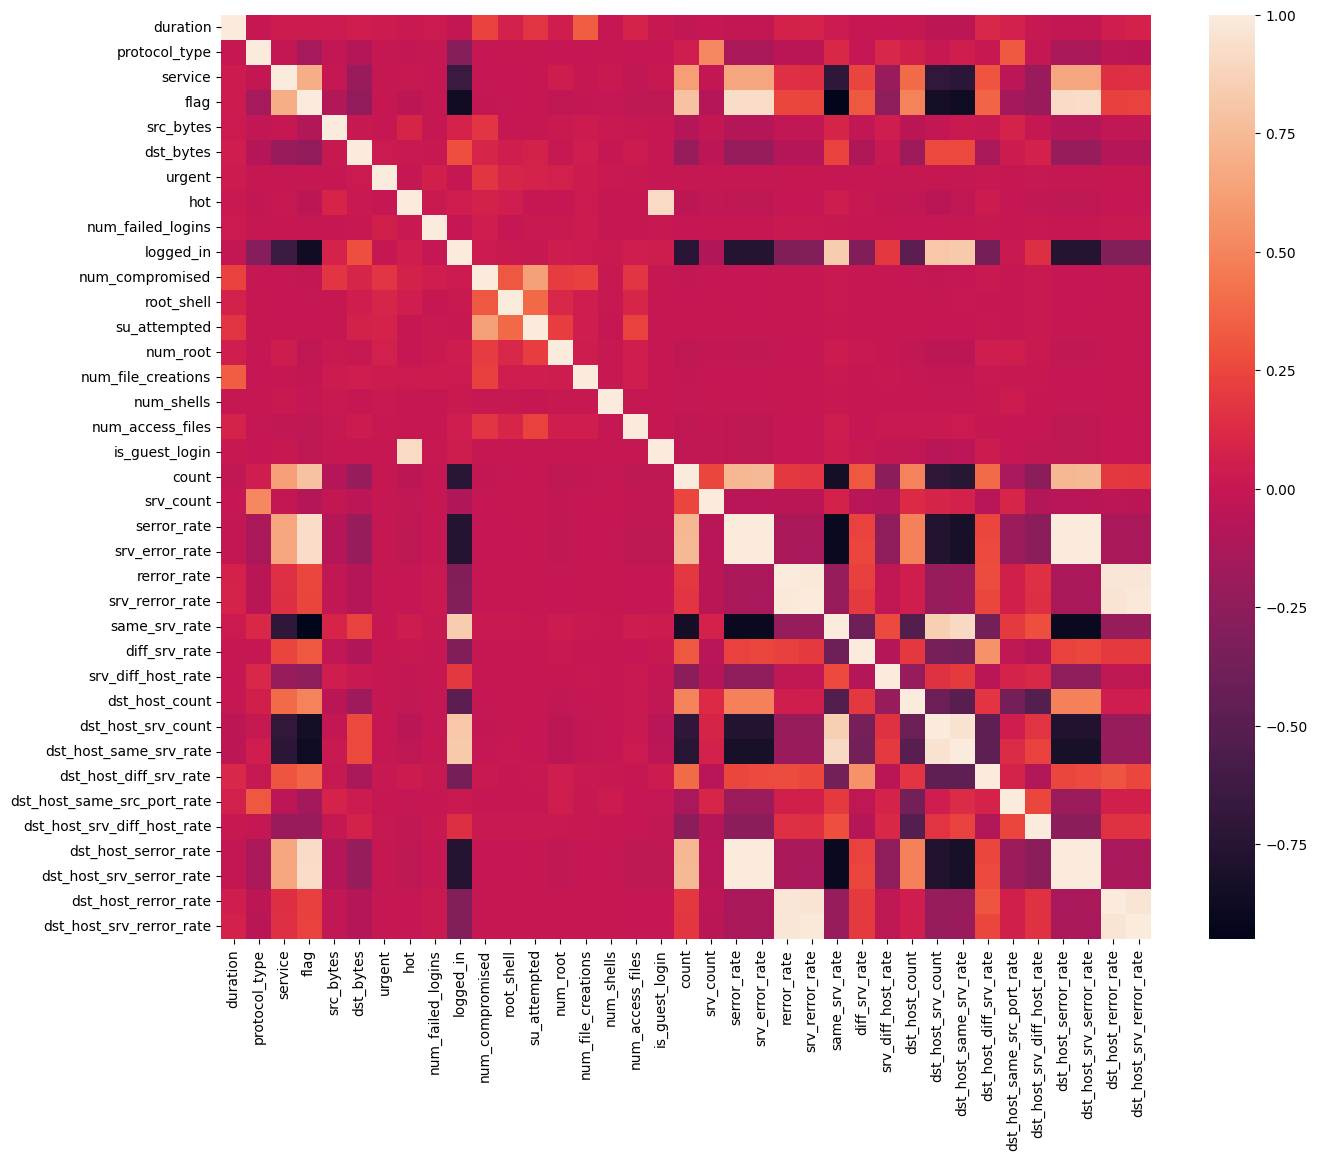

In [33]:
# checking for correlation among the feature columns
df = data.loc[:, data.columns != 'attack']

plt.figure(figsize=(15,12))
sns.heatmap(df.corr())
plt.show()

In [34]:
# developed a user defined function with help of GPT to generate highly correlated pairs of columns from correlation matrix

def find_highly_correlated_pairs(df, threshold=0.9):

  corr_matrix = df.corr().abs()
  corr_matrix.loc[:, :] = np.tril(corr_matrix, k=-1)  # Remove duplicate pairs and diagonal
  correlated_pairs = corr_matrix.stack()
  correlated_pairs = correlated_pairs[correlated_pairs > threshold]
  correlated_pairs = correlated_pairs.reset_index()
  correlated_pairs.columns = ['column1', 'column2', 'correlation']
  return correlated_pairs


In [35]:
# generating list of features which are highly correlated in the dataframe

df = data.loc[:, data.columns != 'attack']

highly_correlated_pairs = find_highly_correlated_pairs(df, threshold=0.85)
print(highly_correlated_pairs)

                     column1               column2  correlation
0                  logged_in                  flag     0.861864
1             is_guest_login                   hot     0.914855
2                serror_rate                  flag     0.924179
3             srv_error_rate                  flag     0.925086
4             srv_error_rate           serror_rate     0.997112
5            srv_rerror_rate           rerror_rate     0.984591
6              same_srv_rate                  flag     0.949654
7              same_srv_rate           serror_rate     0.893653
8              same_srv_rate        srv_error_rate     0.894400
9         dst_host_srv_count         same_srv_rate     0.853095
10    dst_host_same_srv_rate                  flag     0.880939
11    dst_host_same_srv_rate         same_srv_rate     0.907645
12    dst_host_same_srv_rate    dst_host_srv_count     0.948972
13      dst_host_serror_rate                  flag     0.923296
14      dst_host_serror_rate           s

In [36]:
# developed a user defined function to generate list of columns to drop from highly correlated pairs

def get_columns_to_drop(correlated_pairs):

  columns_to_drop = set()
  for _, row in correlated_pairs.iterrows():
    col1, col2 = row['column1'], row['column2']
    columns_to_drop.add(col2)  # Arbitrarily dropping the second column
  return list(columns_to_drop)

In [40]:
# creating a list of columns to drop from the dataframe, since they are highly correlated
columns_to_drop = get_columns_to_drop(highly_correlated_pairs)
print(columns_to_drop)

['dst_host_serror_rate', 'flag', 'rerror_rate', 'hot', 'dst_host_srv_count', 'same_srv_rate', 'srv_rerror_rate', 'serror_rate', 'dst_host_rerror_rate', 'srv_error_rate']


In [38]:
data = data.drop(columns=columns_to_drop)

In [39]:
data.shape

(817550, 28)

We can now start creating the ML model. We are going to do Multinomial Classification using the models Logistic Regression, Random Forest and Naive Bayes. We finalize one of the models and do hypertuning of the final model.

In [41]:
# Import Necessary Libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix


Splitting data into features and target for ML model building

In [42]:
X = data.drop('attack', axis=1)
y = data['attack']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Logistic Regression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train, y_train)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [44]:
# Make predictions on the test set
y_pred_logreg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_nb = nb_clf.predict(X_test)

# Evaluate models
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

Logistic Regression:
                precision    recall  f1-score   support

          Back       0.97      0.97      0.97       192
BufferOverflow       0.71      0.62      0.67         8
      FTPWrite       0.00      0.00      0.00         1
 GuessPassword       0.75      1.00      0.86         9
          NMap       0.93      0.81      0.87       300
       Neptune       1.00      1.00      1.00     45574
        Normal       1.00      1.00      1.00    115151
     PortSweep       0.98      0.94      0.96       586
       RootKit       0.00      0.00      0.00         3
         Satan       0.99      0.95      0.97      1090
         Smurf       0.99      0.98      0.99       596

      accuracy                           1.00    163510
     macro avg       0.76      0.75      0.75    163510
  weighted avg       1.00      1.00      1.00    163510

[[   187      0      0      0      0      0      5      0      0      0
       0]
 [     0      5      0      0      0      0      3    

Looking at the performance above, we finalize the random forest among all 3 choices of the models